In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# load data from csv
df = pd.read_csv('nbaPlayersAllTimesAgilityData.csv')

# print df dimensions
print("df dimensions: ", df.shape)

#  remove ' ' from column names /!\ invisible characters
df.columns = df.columns.str.replace(' ', ' ')

#TODO NOT YET WORKING
# remove duplicates where the player name is the same et save recent data + if Nan check if the data exist in a dup

# print how many player name duplicates there is
print("there is", df['PLAYER'].duplicated().sum(), "duplicates")
df = df.sort_values(by=['PLAYER'], ascending=True)
df = df.drop_duplicates(subset=['PLAYER'], keep='first')
print("there is", df['PLAYER'].duplicated().sum(), "duplicates")

df dimensions:  (1608, 8)
there is 159 duplicates
there is 0 duplicates


In [17]:
# remove nan value and - with 0
df = df.replace('-', 0)
df = df.replace('nan', 0)
#convert Max Vertical Leap (inches) to int
df['Max Vertical Leap (inches)'] = df['Max Vertical Leap (inches)'].apply(pd.to_numeric)
# convert inch to meters and round to decimal
df['Max Vertical Leap (meters)'] = round(df['Max Vertical Leap (inches)'] * 0.0254, 2)

#make a data frame with sum of player with Max Vertical Leap (inches) is the same -+ 5
df2 = df.groupby('Max Vertical Leap (meters)').agg({'PLAYER': 'count'})
df2 = df2.rename(columns={'PLAYER': 'count'})
df2 = df2.reset_index()
df2 = df2.sort_values(by=['count'], ascending=False)
# remove where = 0
df2 = df2[df2['Max Vertical Leap (meters)'] != 0]


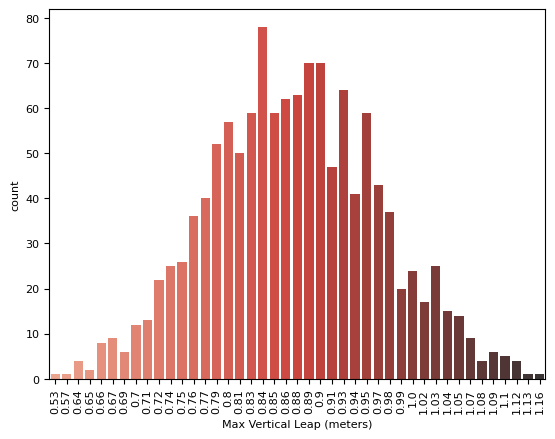

In [18]:
sns.barplot(x='Max Vertical Leap (meters)', y='count', data=df2, palette="Reds_d")
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 8})
plt.show()

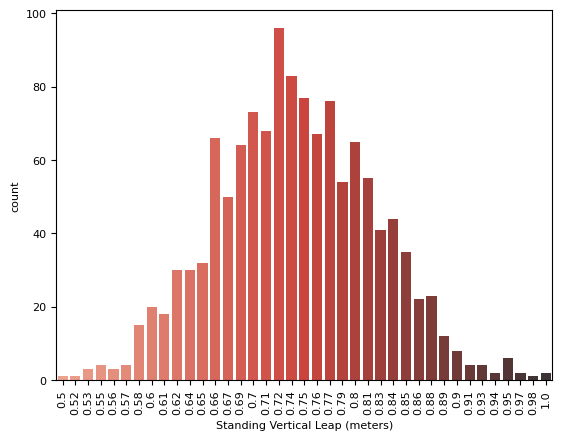

In [19]:
#  same for Standing Vertical Leap (inches)
df['Standing Vertical Leap (inches)'] = df['Standing Vertical Leap (inches)'].apply(pd.to_numeric)
df['Standing Vertical Leap (meters)'] = round(df['Standing Vertical Leap (inches)'] * 0.0254, 2)
df3 = df.groupby('Standing Vertical Leap (meters)').agg({'PLAYER': 'count'})
df3 = df3.rename(columns={'PLAYER': 'count'})
df3 = df3.reset_index()
df3 = df3.sort_values(by=['count'], ascending=False)
df3 = df3[df3['Standing Vertical Leap (meters)'] != 0]
sns.barplot(x='Standing Vertical Leap (meters)', y='count', data=df3, palette="Reds_d")
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 8})
plt.show()

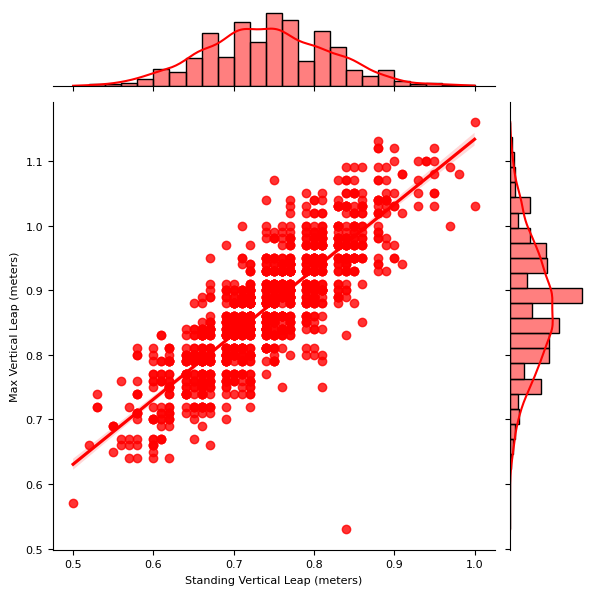

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_18940\2061735980.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.corr()


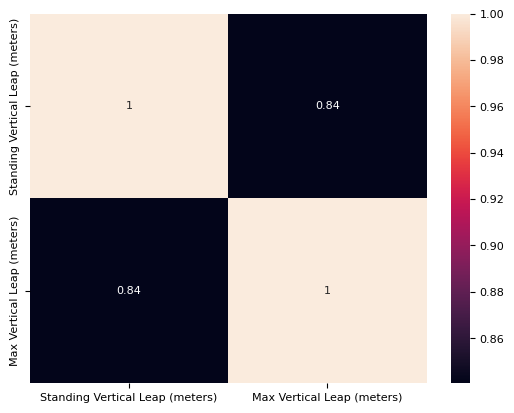

In [20]:
# checks correlations beetwen Standing Vertical Leap (inches) and Max Vertical Leap (inches)
df['Standing Vertical Leap (inches)'] = df['Standing Vertical Leap (inches)'].apply(pd.to_numeric)
df['Max Vertical Leap (inches)'] = df['Max Vertical Leap (inches)'].apply(pd.to_numeric)
df['Standing Vertical Leap (meters)'] = round(df['Standing Vertical Leap (inches)'] * 0.0254, 2)
df['Max Vertical Leap (meters)'] = round(df['Max Vertical Leap (inches)'] * 0.0254, 2)
df = df[df['Standing Vertical Leap (meters)'] != 0]
df = df[df['Max Vertical Leap (meters)'] != 0]
df = df[df['Standing Vertical Leap (meters)'] < 3]
df = df[df['Max Vertical Leap (meters)'] < 3]
sns.jointplot(x='Standing Vertical Leap (meters)', y='Max Vertical Leap (meters)', data=df, kind='reg', color='r')
plt.show()

# plot correlations for meters values with heatmap
df = df[['Standing Vertical Leap (meters)', 'Max Vertical Leap (meters)', 'PLAYER']]
df = df.corr()
sns.heatmap(df, annot=True)
plt.show()

In [21]:
# print df3 dim
print(df3.shape)

(39, 2)


In [23]:
#  load nbaPlayersAllTimesAgilityData.csv and nbaPlayersAllTimesInfoData
dfAg = pd.read_csv('nbaPlayersAllTimesAgilityData.csv')
dfIn = pd.read_csv('nbaPlayersAllTimesInfo.csv')

#  remove ' ' from column names /!\ invisible characters
dfAg.columns = dfAg.columns.str.replace(' ', ' ')
dfIn.columns = dfIn.columns.str.replace(' ', ' ')

# create array with player, height, weight from dfIn and Max Vertical Leap (inches) from dfAg
dfAg = dfAg[['PLAYER', 'Max Vertical Leap (inches)']]
dfIn = dfIn[['PLAYER', 'HEIGHT', 'WEIGHT']]
df = pd.merge(dfAg, dfIn, on='PLAYER')

# remove nan value and - with 0
df = df.replace('-', 0)
df = df.replace('nan', 0)

# convert inch to meters and round to decimal
df['Max Vertical Leap (inches)'] = df['Max Vertical Leap (inches)'].apply(pd.to_numeric)
df['Max Vertical Leap (meters)'] = round(df['Max Vertical Leap (inches)'] * 0.0254, 2)

# print correlation
df = df[['Max Vertical Leap (meters)', 'HEIGHT', 'WEIGHT']]
df = df.corr()

# plot correlation
sns.heatmap(df, annot=True)
plt.show()
 

FileNotFoundError: [Errno 2] No such file or directory: 'nbaPlayersAllTimesInfoData.csv'